In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('my_dataframe.csv',encoding='utf-8')
df.head()  #spoken=1  written=0

,texts,label,parse_tree_depth,noun_count_hi,verb_count_hi,adverb_count_hi,pronoun_count_hi,total_words_hi,noun_percentage_hi,verb_percentage_hi,...,pronoun_percentage_hi,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,2,7,2,0,0,28,25.000000,7.142857,...,0.000000,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,2,2,1,0,1,13,15.384615,7.692308,...,7.692308,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0
2,हमे इन्तजार है ।,1,1,1,0,0,1,4,25.000000,0.000000,...,25.000000,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,2,3,1,0,1,11,27.272727,9.090909,...,9.090909,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0
4,जयपुर,0,0,0,0,0,0,1,0.000000,0.000000,...,0.000000,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0


In [14]:
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
X = X.drop('total_words_hi', axis=1)
y = df['label']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [17]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
})

In [18]:
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
                    Feature  Coefficient  Abs_Coefficient
16       hesitation_markers     1.824560         1.824560
10  avg_characters_per_word    -1.428635         1.428635
1             noun_count_hi    -1.064958         1.064958
12         case_marker_perc    -0.778341         0.778341
11         token_type_ratio    -0.754927         0.754927
9            words_per_sent     0.650945         0.650945
4          pronoun_count_hi     0.602886         0.602886
14        conjunction_count    -0.334910         0.334910
0          parse_tree_depth    -0.319875         0.319875
7      adverb_percentage_hi     0.252511         0.252511
3           adverb_count_hi    -0.191748         0.191748
2             verb_count_hi    -0.169389         0.169389
17        wh_question_count    -0.145808         0.145808
15  conjunctions_percentage    -0.127754         0.127754
5        noun_percentage_hi    -0.077247         0.077247
13        case_marker_count    -0.0771

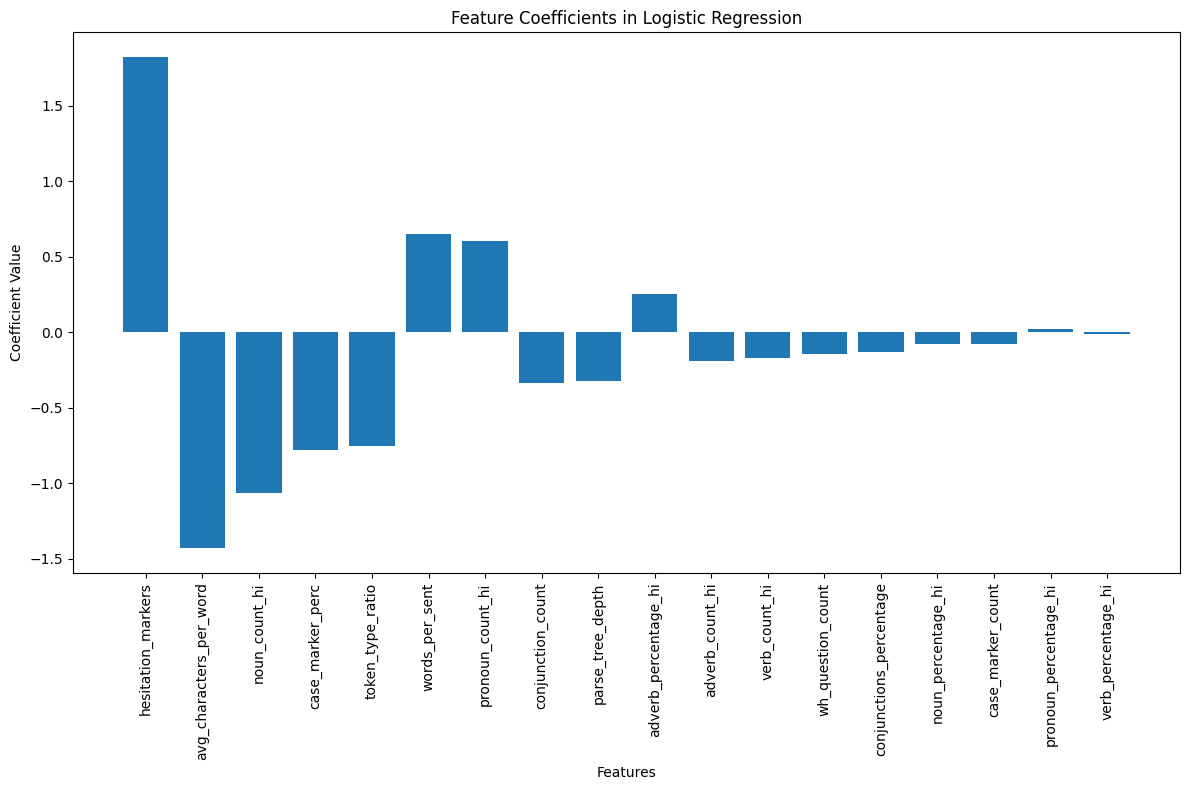

In [19]:
plt.figure(figsize=(12, 8))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()